In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

C:\Users\kriti\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
# Loading the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
print('Train: {}'.format(X_train.shape))
print('Test: {}'.format(X_test.shape))

Train: (50000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


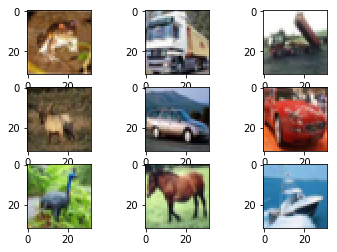

In [5]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    
plt.show()

In [6]:
# Data Preprocessing
seed = 6
np.random.seed(seed)

(X_train,y_train),(X_test, y_test)=cifar10.load_data()

# Normalizing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [7]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [8]:
# hot encode
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_class = Y_train.shape[1]

print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
# Building the model
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, Activation, GlobalAveragePooling2D
from keras.optimizers import SGD

In [10]:
def allcnn(weights=None):
    model = Sequential()
    
    model.add(Conv2D(96, (3,3), padding= 'same', input_shape=(32,32,3)))
    model.add(Activation("relu"))
    model.add(Conv2D(96, (3,3), padding= "same"))
    model.add(Activation("relu"))
    model.add(Conv2D(96, (3,3), padding= "same", strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3), padding= "same"))
    model.add(Activation("relu"))
    model.add(Conv2D(192, (3,3), padding= "same"))
    model.add(Activation("relu"))
    model.add(Conv2D(192, (3,3), padding= "same", strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3), padding= "same"))
    model.add(Activation("relu"))
    model.add(Conv2D(192, (1,1), padding= "valid"))
    model.add(Activation("relu"))
    model.add(Conv2D(10, (1,1), padding= "valid"))
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation("softmax"))
    
    if weights:
        model.load_weights(weights)
    
    return model

In [11]:
# Defining hyperparameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

model = allcnn()

sgd = SGD(lr= learning_rate, decay= weight_decay, momentum= momentum, nesterov= True)
model.compile(loss="categorical_crossentropy", optimizer= sgd, metrics=["accuracy"])

print(model.summary())

epochs = 350
batch_size = 32

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs= epochs, batch_size=batch_size, verbose=1)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '7592' (I am process '8304')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

KeyboardInterrupt: 

In [12]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

weights = "all_cnn_weights_0.9088_0.4994.hdf5"
model = allcnn(weights)

sgd = SGD(lr= learning_rate, decay= weight_decay, momentum= momentum, nesterov= True)
model.compile(loss="categorical_crossentropy", optimizer= sgd, metrics=["accuracy"])

scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: {}".format(scores[1]))

10000/10000 [==============================] - 113s 11ms/step
Accuracy: 0.8751


In [13]:
classes = range(0,10)
names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']
class_labels = dict(zip(classes, names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [14]:
batch = X_test[10:19]
labels = np.argmax(Y_test[10:19], axis= -1)

predictions = model.predict(batch, verbose= 1)

class_results = np.argmax(predictions, axis=-1)
print(class_results)

9/9 [==============================] - 0s 11ms/step
[0 9 5 7 9 8 5 7 8]


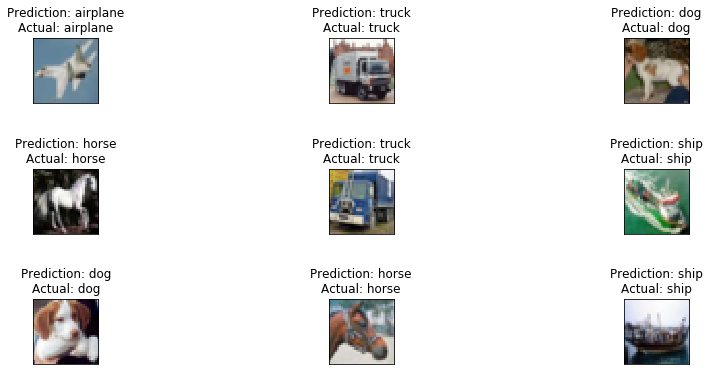

In [18]:
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    for key, value in class_labels.items():
        if class_results[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img)
    
plt.show()